In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
import NN_functions as nnf

In [3]:
filename = 'Convergence_history.pickle'
file = open(filename, 'rb')
dict_ = pickle.load(file)

file.close()

In [4]:
List_it_loss_LBFGS = dict_[0]
List_it_loss_valid_LBFGS = dict_[1]
List_it_loss_Adam = dict_[2]
List_it_loss_valid_Adam = dict_[3]

In [5]:
plt.rc('text',usetex = False)
plt.figure(figsize = (10,10))
plt.scatter(np.array(List_it_loss_LBFGS)[:,0],np.array(List_it_loss_LBFGS)[:,1],label='LBFGS train',marker='.',s=20,c='red')
# plt.scatter(np.array(List_it_loss_valid_LBFGS)[:,0],np.array(List_it_loss_valid_LBFGS)[:,1],label='LBFGS valid',marker='.',s=1.,c='pink')
# Validation loss does not seem to be accessible during L-BFGS-B training. It returns constant values
plt.scatter(np.array(List_it_loss_Adam)[:,0]+np.max(np.array(List_it_loss_LBFGS)[:,0]),np.array(List_it_loss_Adam)[:,1],label='Adam train',marker='.',s=20,c='blue')
plt.scatter(np.array(List_it_loss_valid_Adam)[:,0]+np.max(np.array(List_it_loss_LBFGS)[:,0]),np.array(List_it_loss_valid_Adam)[:,1],label='Adam valid',marker='.',s=20,c='green')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.yscale('log')
plt.legend()
plt.title(' Nmodes = 4, physical eq, Sparse data, 2 zones sampling')
plt.tight_layout()
plt.savefig('Convergence_history.tif', dpi = 400)
plt.close()



In [6]:
comp_file = 'Comparison_history.pickle'
compa = open(comp_file,'rb')
dictC_ = pickle.load(compa)

/Users/kevinrizk/Desktop/Project1-main-2/ModalPINN_Ur_1000000_Re_100.0_141/NN_functions.py:519: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(x_np,y_np,c=np.log10(np.square(c_np_1-c_np_2)),marker='.',s=1.)


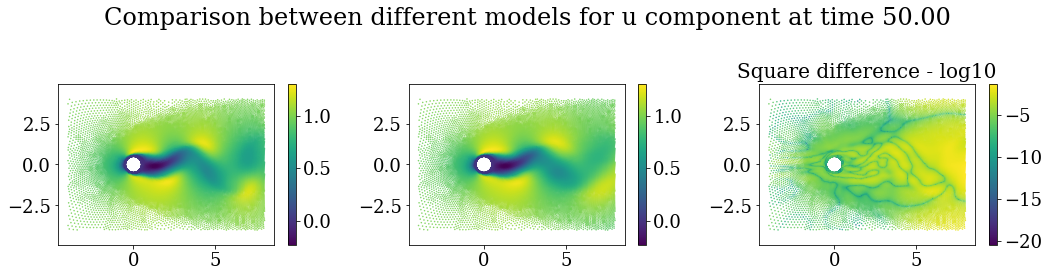

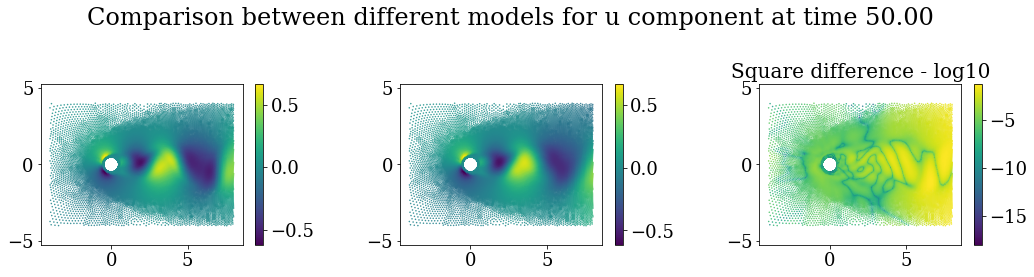

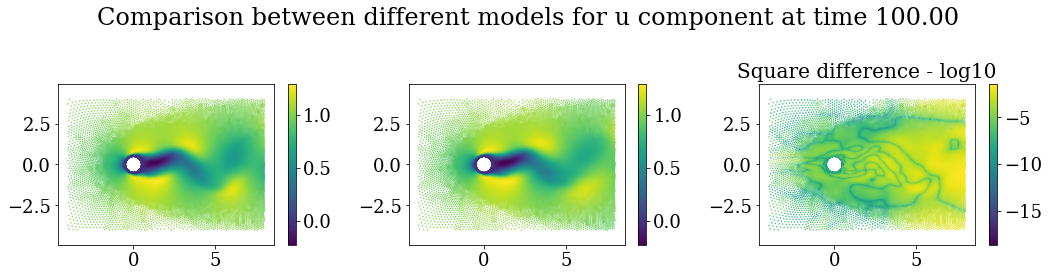

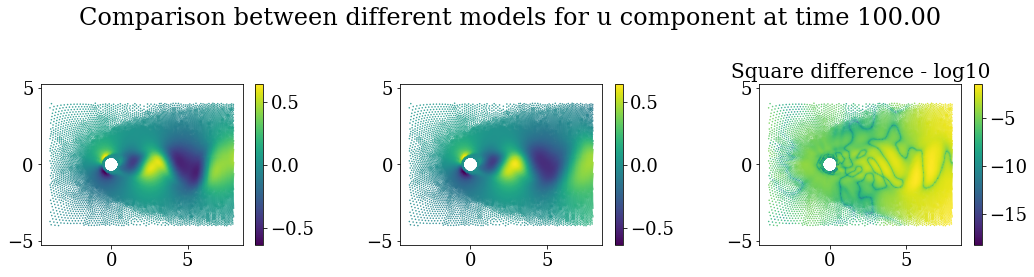

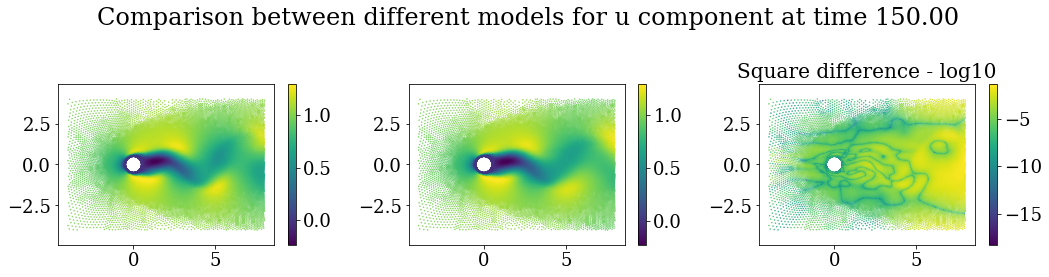

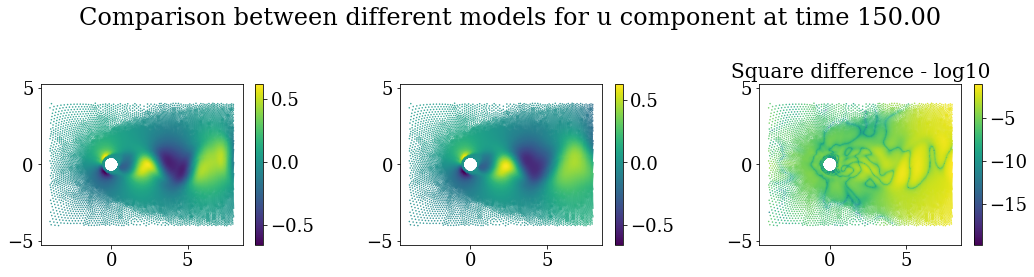

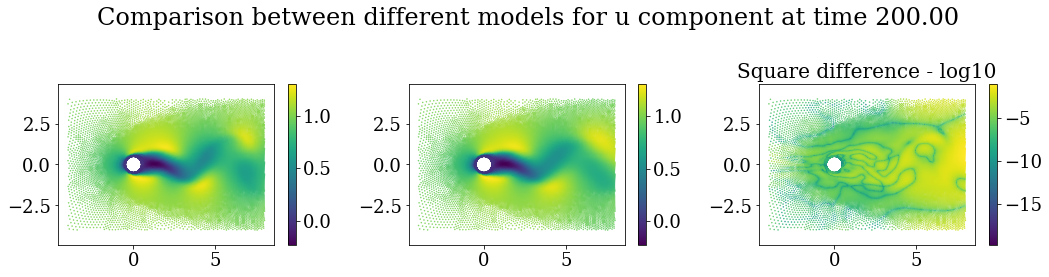

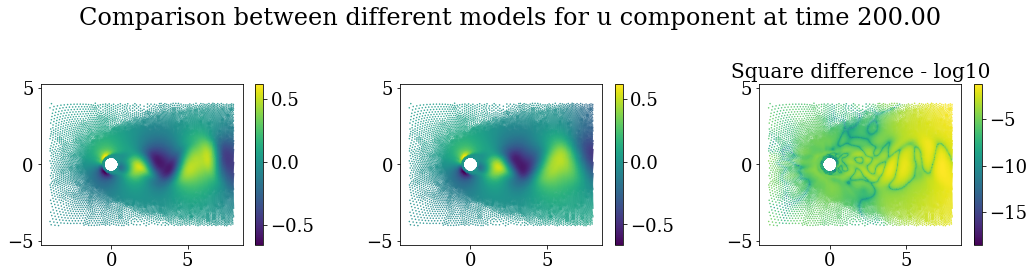

In [7]:
X_comp_u_mp, X_comp_v_mp, X_comp_p_mp, Y_comp_u_mp, Y_comp_v_mp, Y_comp_p_mp, U_comp_mp, V_comp_mp, P_comp_mp, fluid_u_comp_mp, fluid_v_comp_mp, fluid_p_comp_mp, timesteps_mp = dictC_
for ind, timestep in enumerate(timesteps_mp):
    nnf.plot_compare_3plot(X_comp_u_mp[ind], Y_comp_u_mp[ind], U_comp_mp[ind], fluid_u_comp_mp[ind], 
                           suptitle = 'Comparison between different models for u component at time ' + '{0:.2f}'.format(timestep))
    plt.savefig('diff_u_t_'+'{0:.2f}'.format(timestep)+'.tif', dpi = 300)
    nnf.plot_compare_3plot(X_comp_v_mp[ind], Y_comp_v_mp[ind], V_comp_mp[ind], fluid_v_comp_mp[ind], 
                           suptitle = 'Comparison between different models for u component at time ' + '{0:.2f}'.format(timestep))
    plt.savefig('diff_v_t_'+'{0:.2f}'.format(timestep)+'.tif', dpi = 300)
    nnf.plot_compare_3plot(X_comp_p_mp[ind], Y_comp_p_mp[ind], P_comp_mp[ind], fluid_p_comp_mp[ind], 
                           suptitle = 'Comparison between different models for u component at time ' + '{0:.2f}'.format(timestep))
    plt.savefig('diff_p_t_'+'{0:.2f}'.format(timestep)+'.tif', dpi = 300)
    plt.close()